### **Import Libraries**

In [2]:
# base library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from scipy import stats
from scipy.stats import skew, normaltest, kstest, shapiro
import ppscore as pps

import pickle
import warnings
warnings.filterwarnings('ignore')

-----

--------

# **2. Data Understanding**

---
---

* For this project, we use a dataset that describing Portugal bank marketing campaigns conducted using telemarketing, offering customers to place a term deposit. If after all marking afforts customer had agreed to place deposit - target variable marked 'yes', otherwise 'no'.  

* Each row represents information from a customer and the socio-economic circumstances of the previous marketing campaign.


(source : https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset)

### **Attribute Information**


**Customer Demographic**
<br>

| Attribute | Data Type | Description |
| --- | --- | --- |
|Age |Integer | age of customer |
|Job |Text | type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown") |
|Marital |Text | marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed) |
|Education |Text | level of education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown") |
|Default |Text | has credit in default? (categorical: "no","yes","unknown") |
|Housing |Text | has housing loan? (categorical: "no","yes","unknown") |
|Loan |Text | has personal loan? (categorical: "no","yes","unknown") |
<br>

**Information During This Campaign**

| Attribute | Data Type | Description |
| --- | --- | --- |
|Contact |Text | contact communication type (categorical: "cellular","telephone") |
|Month |Text | last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec") |
|Day_of_week |Text | last contact day of the week (categorical: "mon","tue","wed","thu","fri") |
|Duration |Integer | last contact duration, in seconds. Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known |
|Campaign |Integer | number of contacts performed during this campaign and for this customer (numeric, includes last contact) |
<br>

**Information From Previous Campaign**

| Attribute | Data Type | Description |
| --- | --- | --- |
|Pdays |Integer | number of days that passed by after the customer was last contacted from a previous campaign (numeric; 999 means customer was not previously contacted) |
|Previous |Integer | number of contacts performed before this campaign and for this customer |
|Poutcome |Text | outcome of the previous marketing campaign (categorical: "failure","nonexistent","success") |
<br>

**Customer Socio-Economic**

| Attribute | Data Type | Description |
| --- | --- | --- |
|Emp.var.rate |Float | employment variation rate - quarterly indicator |
|Cons.price.idx |Float | consumer price index - monthly indicator |
|Cons.conf.idx |Float | consumer confidence index - monthly indicator |
|Euribor3m |Float | euribor 3 month rate - daily indicator |
|Nr.employed |Float | number of employees - quarterly indicator |
<br>

**Target**

| Attribute | Data Type | Description |
| --- | --- | --- |
|Y |Text | has the customer subscribed a term deposit? (binary: "yes","no") |

## <b>2.1 Data Exploration

In [3]:
# Read Dataset
pd.set_option('display.max_columns',None)
df = pd.read_csv('bank-additional-full.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Check Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Check Duplicate Data**

In [5]:
# check duplicate data

print("Total of duplicated data is", df.duplicated().sum())
pct_duplicated = (df.duplicated().sum() / len(df) * 100).round(2)
print("The percentage of duplicated data is", pct_duplicated,'%')

Total of duplicated data is 12
The percentage of duplicated data is 0.03 %


In [6]:
df[df.duplicated(keep='first')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


There are 12 duplicate rows in the dataset and the percentage of duplicate data is 0.03%. Duplicates can introduce bias or noise into our model, especially if they are unintended or erroneous. Removing them ensures that each record in our dataset is unique since the information we have is very spesific, leading to cleaner data and potentially better model performance. Therefore we will **remove the duplicate data**.

In [7]:
# Drop Duplicated Rows

df.drop_duplicates(inplace=True)
df.shape

(41176, 21)

**Check Unique Values**

In [8]:
# Check Unique Value
pd.set_option('display.max_colwidth',None)

pd.DataFrame({
    'Feature':df.columns.values,
    'Number of Unique':df.nunique().values,
    'Unique Values':[df[i].unique() for i in df.columns]
})

,Feature,Number of Unique,Unique Values
0,age,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89]"
1,job,12,"[housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student]"
2,marital,4,"[married, single, divorced, unknown]"
3,education,8,"[basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]"
4,default,3,"[no, unknown, yes]"
5,housing,3,"[no, yes, unknown]"
6,loan,3,"[no, yes, unknown]"
7,contact,2,"[telephone, cellular]"
8,month,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]"
9,day_of_week,5,"[mon, tue, wed, thu, fri]"


**Summary** :  
1. The dataset contains 41,176 entries and 21 columns after removing 12 duplicated rows.
2. Column renaming are recommended for better comprehension by the stackholders.
3. Column `emp.var.rate` and `cons.conf.idx` have negative value which is possible because it calculate the difference between current and previous condition.
4. This dataset has no missing values (null values) but there are data labeled 'unknown' in column `marital`, `default`, `housing`, and `loan`.

## **2.2 Column Renaming**

In [9]:
# Renaming Column for Better Comprehension
df.rename(columns={'age':'Age',
                   'job':'Job',
                   'marital':'Marital',
                   'education':'Education',
                   'default':'Credit_Default',
                   'housing':'Housing_Loan',
                   'loan':'Personal_Loan',
                   'contact':'Contact_Type',
                   'day_of_week':'LastContact_Day',
                   'month':'LastContact_Month',
                   'duration':'LastContact_Duration(s)',
                   'campaign':'Qty_Contact',
                   'pdays':'Prev_DaysPassed',
                   'previous':'Prev_QtyContact',
                   'poutcome':'Prev_Outcome',
                   'emp.var.rate':'EmpVar_Rate',
                   'cons.price.idx':'ConsPrice_Idx',
                   'cons.conf.idx':'ConsConf_Idx',
                   'euribor3m':'Euribor3M_Rate',
                   'nr.employed':'Qty_Employee',
                   'y':'Deposit',
                   },inplace=True)

In [10]:
# Define Variable to Store Numerical Features
numerical_cols = df.select_dtypes(include=['int','float64']).columns[:].tolist()

# Define Variable to Store Categorical Features
categorical_cols = df.select_dtypes(include=['object']).columns[:].tolist()

In [11]:
# Capitalize Unique Values in Categorical Features
df[categorical_cols] = df[categorical_cols].applymap(str.capitalize)

## **2.3 Data Descriptive Summary**

In [12]:
# Descriptive Summary for Numerical Features
df.describe()

,Age,LastContact_Duration(s),Qty_Contact,Prev_DaysPassed,Prev_QtyContact,EmpVar_Rate,ConsPrice_Idx,ConsConf_Idx,Euribor3M_Rate,Qty_Employee
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [13]:
# Descriptive Summary for Categorical Features
df.describe(include=object)

,Job,Marital,Education,Credit_Default,Housing_Loan,Personal_Loan,Contact_Type,LastContact_Month,LastContact_Day,Prev_Outcome,Deposit
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,Admin.,Married,University.degree,No,Yes,No,Cellular,May,Thu,Nonexistent,No
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


**Key Insight** :


*   **Diverse Age Range**: The dataset includes a wide range of ages from 17-98 years old.
*   **Variable Interaction Duration**: There is significant variability in the duration of the last contact, indicating diverse interaction levels.
*   **Low Previous Contact Frequency**: Most individuals have had minimal previous contacts.
*   **Economic Indicators**: Economic indicators like the ConsPrice Index and Euribor3M Rate show some variability, while the ConsConf Index is consistently negative.

*   **Dominant Categories**: "Admin." jobs, "Married" marital status, and "University.degree" education levels are prominent. Most individuals do not have credit defaults, personal loans, and did not subscribe to a deposit.
*   **Common Contact Practices**: Mobile phone contacts (Cellular) are prevalent, with a peak in May and a common contact day of Thursday.
*   **Imbalance Class**: The majority of individuals did not subscribe to a deposit, which might indicate a lower conversion rate or a targeted demographic that is less likely to take up the offer.
*   **Previous Outcome**: The majority of individuals have a "Nonexistent" previous outcome, indicating that there were few prior outcomes recorded.

---

---

# **3. Exploratory Data Analysis**


---
---

## <b>3.1 Numerical Features

#### <b> Check Distribution of Data - Statistical Test

In [14]:
# Apply normality tests and calculate skewness
alpha = 0.05

agospearson_pvalues = [normaltest(df[col]).pvalue for col in numerical_cols]
ks_pvalues = [kstest(df[col], 'norm').pvalue for col in numerical_cols]
shapiro_values = [shapiro(df[col]).pvalue for col in numerical_cols]
skew_values = [skew(df[col]) for col in numerical_cols]
skewness_type = ['Right-Skewed' if skew > 0 else 'Left-Skewed' if skew < 0 else 'No Skew' for skew in skew_values]

# Determine if the distribution is normal
normal_distribution = [
    'Yes' if (p > alpha and ks_p > alpha and sw_p > alpha) else 'No'
    for p, ks_p, sw_p in zip(agospearson_pvalues, ks_pvalues, shapiro_values)]

# Create DataFrame with the results
pd.DataFrame({
    'Feature': numerical_cols,
    'Skewness': [round(value, 2) for value in skew_values],
    'Skewness Type': skewness_type,
    'Agos Pearson P-value': [round(value, 4) for value in agospearson_pvalues],
    'KS P-value': [round(value, 4) for value in ks_pvalues],
    'Saphiro P-value': [round(value, 4) for value in shapiro_values],
    'Normal Distribution': normal_distribution
})

,Feature,Skewness,Skewness Type,Agos Pearson P-value,KS P-value,Saphiro P-value,Normal Distribution
0,Age,0.78,Right-Skewed,0.0,0.0,0.0,No
1,LastContact_Duration(s),3.26,Right-Skewed,0.0,0.0,0.0,No
2,Qty_Contact,4.76,Right-Skewed,0.0,0.0,0.0,No
3,Prev_DaysPassed,-4.92,Left-Skewed,0.0,0.0,0.0,No
4,Prev_QtyContact,3.83,Right-Skewed,0.0,0.0,0.0,No
5,EmpVar_Rate,-0.72,Left-Skewed,0.0,0.0,0.0,No
6,ConsPrice_Idx,-0.23,Left-Skewed,0.0,0.0,0.0,No
7,ConsConf_Idx,0.30,Right-Skewed,0.0,0.0,0.0,No
8,Euribor3M_Rate,-0.71,Left-Skewed,0.0,0.0,0.0,No
9,Qty_Employee,-1.04,Left-Skewed,0.0,0.0,0.0,No


All of the numerical features aren't distributed normally based on three statistical tests. Some socio-economics features are left-skewed while campaign information are right-skewed.

### **Visualization of Distribution of the Data**

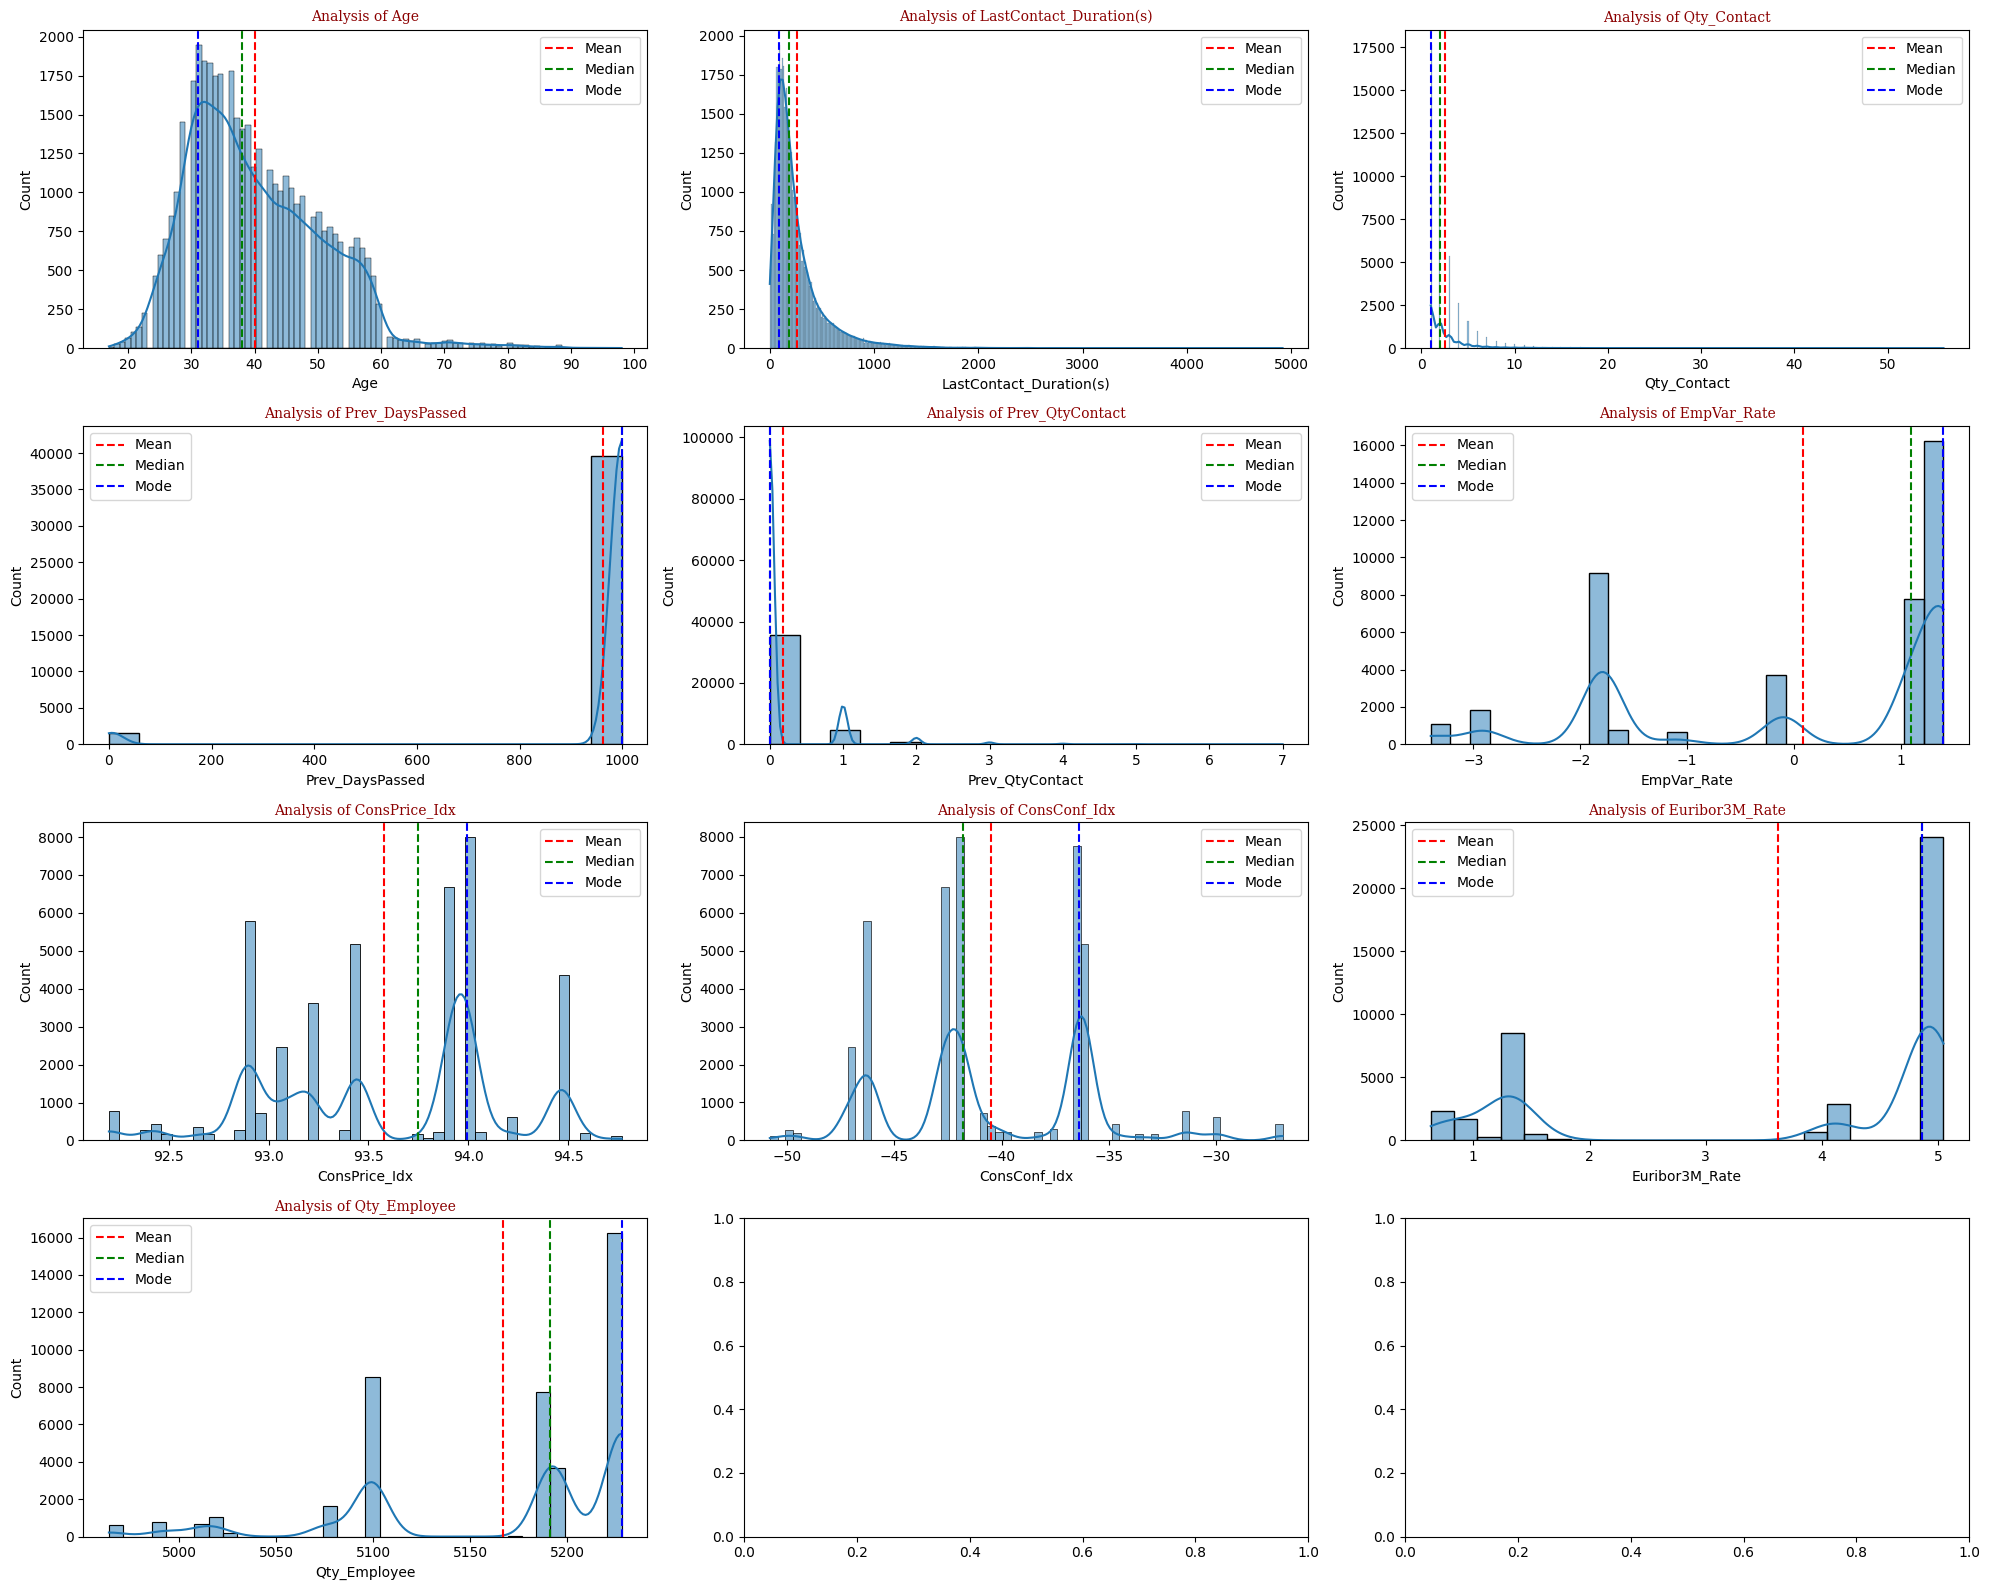

In [15]:
# Plot Distribution for Numerical

def generate_distribution_plot(train_df, continuous_features):
    # create copy of dataframe
    data = train_df[continuous_features].copy()
    # Create subplots
    fig, axes = plt.subplots(nrows=4, ncols=3,figsize=(20,16))
    fig.subplots_adjust(hspace=0.7)

    # set fontdict
    font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 10,
        }

    # Generate distplot
    for ax, feature in zip(axes.flatten(), data.columns):
        feature_mean = data[feature].mean()
        feature_median = data[feature].median()
        feature_mode = data[feature].mode().values[0]
        sns.histplot(data[feature],ax=ax, kde=True)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
        ax.axvline(feature_mean, color='r', linestyle='--', label="Mean")
        ax.axvline(feature_median, color='g', linestyle='--', label="Median")
        ax.axvline(feature_mode, color='b', linestyle='--', label="Mode")
        ax.legend()
    plt.tight_layout()
    plt.show()

generate_distribution_plot(df, numerical_cols)

### **Checking Outliers**

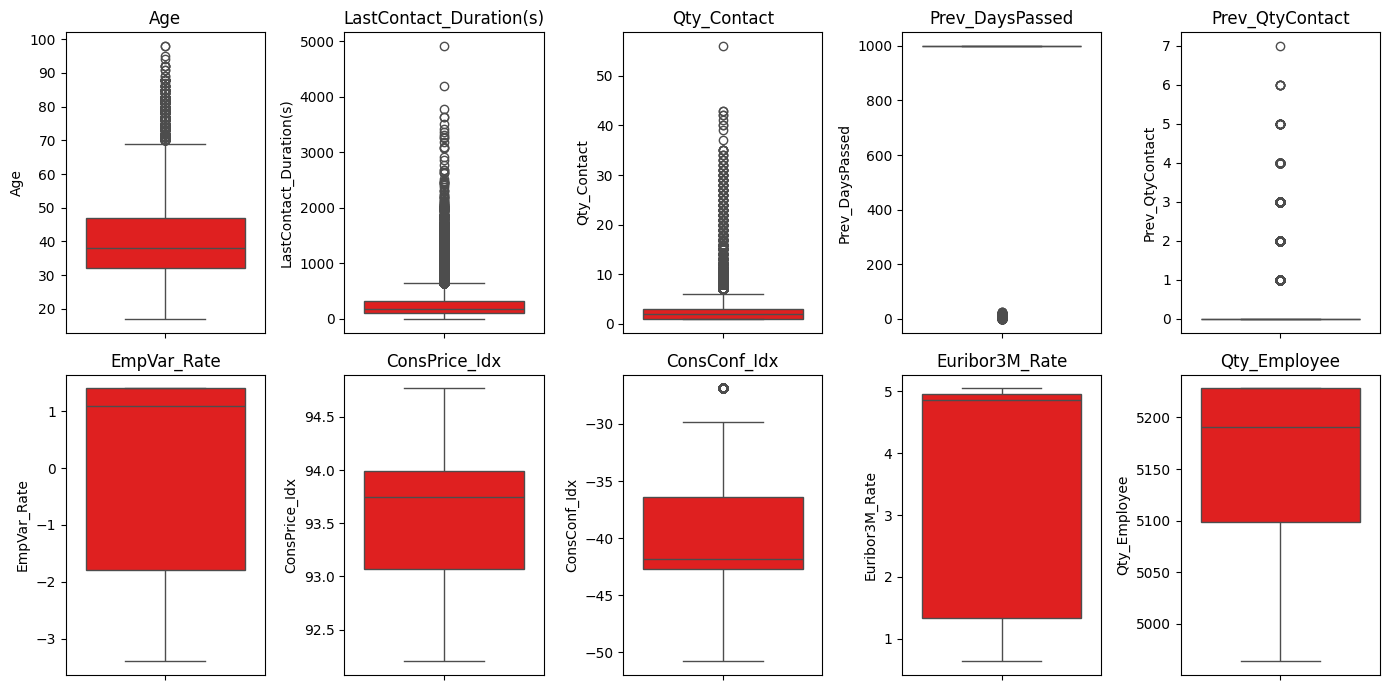

In [16]:
# Boxplot Visualization

plt.figure(figsize=(14, 7))
for i in range(0, len(numerical_cols)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(df[numerical_cols[i]], color='red', orient='v')
    plt.title(numerical_cols[i])
    plt.tight_layout()

In [17]:
# Define Function to Calculate IQR and Outliers
def IQR_outlier(data, col):
    Q1 = data[col].quantile(1/4)
    Q3 = data[col].quantile(3/4)
    IQR = Q3 - Q1
    outlier_lower = Q1 - 1.5 * IQR
    outlier_upper = Q3 + 1.5 * IQR
    total_outliers = len(data[(data[col] < outlier_lower) | (data[col] > outlier_upper)])
    outlier_percentage = round(total_outliers / len(data[col]) * 100, 2)
    return outlier_lower, outlier_upper, total_outliers, outlier_percentage

In [18]:
# Define an Empty List to Store Function Result
outlier = []
for col in numerical_cols:
    lower_band, upper_band, total_outliers, outlier_percentage = IQR_outlier(df, col)
    outlier.append([col, lower_band, upper_band, total_outliers, outlier_percentage])

# Turn the Outliers List Into a Dataframe
outlier_info_df = pd.DataFrame(outlier, columns=["Columns", "Lower Band", "Upper Band", "Total Outliers", "Percentage of Outliers (%)"])
outlier_info_df

,Columns,Lower Band,Upper Band,Total Outliers,Percentage of Outliers (%)
0,Age,9.5000,69.5000,468,1.14
1,LastContact_Duration(s),-223.5000,644.5000,2963,7.20
2,Qty_Contact,-2.0000,6.0000,2406,5.84
3,Prev_DaysPassed,999.0000,999.0000,1515,3.68
4,Prev_QtyContact,0.0000,0.0000,5625,13.66
5,EmpVar_Rate,-6.6000,6.2000,0,0.00
6,ConsPrice_Idx,91.6965,95.3725,0,0.00
7,ConsConf_Idx,-52.1500,-26.9500,446,1.08
8,Euribor3M_Rate,-4.0815,10.3865,0,0.00
9,Qty_Employee,4905.6000,5421.6000,0,0.00


There are 5 numerical column that have outliers below 10% and 1 column with outlier above 10%. We will analyze further for these outliers.

### **Age Analysis**

This data become outlier because majority of customer's age are between 30-40 years old, based on this [article](https://www-worldometers-info.translate.goog/demographics/portugal-demographics/?_x_tr_sl=en&_x_tr_tl=id&_x_tr_hl=id&_x_tr_pto=tc), the average of Portugal's life expectancy is around 83 years old. The age under 18 years old are invalid since the minimum age for opening bank account is 18 years old referred to [this site](https://www.movingto.io/pt/bank-accounts-portugal).

In [19]:
# Outliers
display(df[df['Age']> 83].describe(), df[df['Age']> 83].describe(include='object'))

,Age,LastContact_Duration(s),Qty_Contact,Prev_DaysPassed,Prev_QtyContact,EmpVar_Rate,ConsPrice_Idx,ConsConf_Idx,Euribor3M_Rate,Qty_Employee
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,87.492308,275.400000,2.061538,784.815385,0.584615,-2.061538,93.226831,-39.420000,1.034754,5035.376923
std,3.143063,214.904543,1.628620,411.980730,0.966506,0.762334,0.708774,7.979705,0.387380,51.397546
min,84.000000,48.000000,1.000000,2.000000,0.000000,-3.400000,92.201000,-50.000000,0.635000,4963.600000
25%,85.000000,129.000000,1.000000,999.000000,0.000000,-2.900000,92.713000,-47.100000,0.720000,5008.700000
50%,88.000000,211.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-37.500000,0.881000,5017.500000
75%,88.000000,333.000000,2.000000,999.000000,1.000000,-1.800000,93.876000,-33.000000,1.400000,5099.100000
max,98.000000,1064.000000,7.000000,999.000000,4.000000,-1.100000,94.601000,-26.900000,1.663000,5099.100000


,Job,Marital,Education,Credit_Default,Housing_Loan,Personal_Loan,Contact_Type,LastContact_Month,LastContact_Day,Prev_Outcome,Deposit
count,65,65,65,65,65,65,65,65,65,65,65
unique,2,3,7,2,3,3,2,10,5,3,2
top,Retired,Divorced,Basic.4y,No,Yes,No,Cellular,Mar,Wed,Nonexistent,No
freq,60,33,46,47,38,54,61,16,26,43,33


In [20]:
df[df['Age'] > 69.5]

,Age,Job,Marital,Education,Credit_Default,Housing_Loan,Personal_Loan,Contact_Type,LastContact_Month,LastContact_Day,LastContact_Duration(s),Qty_Contact,Prev_DaysPassed,Prev_QtyContact,Prev_Outcome,EmpVar_Rate,ConsPrice_Idx,ConsConf_Idx,Euribor3M_Rate,Qty_Employee,Deposit
27713,70,Retired,Divorced,Basic.4y,No,Yes,No,Cellular,Mar,Mon,187,3,999,0,Nonexistent,-1.8,92.843,-50.0,1.811,5099.1,Yes
27757,76,Retired,Married,University.degree,No,No,Yes,Cellular,Mar,Thu,167,9,999,0,Nonexistent,-1.8,92.843,-50.0,1.757,5099.1,No
27780,73,Retired,Married,University.degree,No,Yes,No,Cellular,Mar,Tue,179,1,999,1,Failure,-1.8,92.843,-50.0,1.687,5099.1,No
27800,88,Retired,Divorced,Basic.4y,No,Yes,No,Cellular,Mar,Wed,48,1,999,0,Nonexistent,-1.8,92.843,-50.0,1.663,5099.1,No
27802,88,Retired,Divorced,Basic.4y,No,No,No,Cellular,Mar,Wed,266,2,999,0,Nonexistent,-1.8,92.843,-50.0,1.663,5099.1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,84,Retired,Divorced,Basic.4y,Unknown,Yes,Yes,Cellular,Oct,Mon,138,4,3,1,Success,-1.1,94.601,-49.5,1.000,4963.6,No
40996,81,Retired,Married,Basic.4y,No,Yes,No,Cellular,Oct,Wed,621,1,999,2,Failure,-1.1,94.601,-49.5,1.016,4963.6,Yes
41004,80,Retired,Married,Professional.course,No,Yes,No,Cellular,Oct,Thu,411,1,999,1,Failure,-1.1,94.601,-49.5,1.025,4963.6,Yes
41183,73,Retired,Married,Professional.course,No,Yes,No,Cellular,Nov,Fri,334,1,999,0,Nonexistent,-1.1,94.767,-50.8,1.028,4963.6,Yes


In [21]:
df[df['Age'] < 18]

,Age,Job,Marital,Education,Credit_Default,Housing_Loan,Personal_Loan,Contact_Type,LastContact_Month,LastContact_Day,LastContact_Duration(s),Qty_Contact,Prev_DaysPassed,Prev_QtyContact,Prev_Outcome,EmpVar_Rate,ConsPrice_Idx,ConsConf_Idx,Euribor3M_Rate,Qty_Employee,Deposit
37140,17,Student,Single,Unknown,No,Yes,No,Cellular,Aug,Wed,432,3,4,2,Success,-2.9,92.201,-31.4,0.884,5076.2,No
37539,17,Student,Single,Basic.9y,No,Yes,No,Cellular,Aug,Fri,182,2,999,2,Failure,-2.9,92.201,-31.4,0.869,5076.2,No
37558,17,Student,Single,Basic.9y,No,Yes,No,Cellular,Aug,Fri,92,3,4,2,Success,-2.9,92.201,-31.4,0.869,5076.2,No
37579,17,Student,Single,Basic.9y,No,Unknown,Unknown,Cellular,Aug,Fri,498,2,999,1,Failure,-2.9,92.201,-31.4,0.869,5076.2,Yes
38274,17,Student,Single,Unknown,No,No,Yes,Cellular,Oct,Tue,896,1,2,2,Success,-3.4,92.431,-26.9,0.742,5017.5,Yes


So, for Age **we will delete the data above 83 and under 18 years old**, and consider to **binning or grouping the Age** for handling the outliers.

### **Contact Quantity Analysis**

In [22]:
# outlier data
display(df[df['Qty_Contact']> 6].describe(),df[df['Qty_Contact']> 6].describe(include='object'))

,Age,LastContact_Duration(s),Qty_Contact,Prev_DaysPassed,Prev_QtyContact,EmpVar_Rate,ConsPrice_Idx,ConsConf_Idx,Euribor3M_Rate,Qty_Employee
count,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000
mean,40.150042,190.559435,11.004156,991.987116,0.051122,0.818953,93.789961,-40.561347,4.358310,5199.896592
std,9.977247,247.655151,5.417610,83.152068,0.263285,1.168708,0.498564,3.682855,1.319473,51.200487
min,20.000000,0.000000,7.000000,1.000000,0.000000,-3.400000,92.201000,-50.000000,0.644000,4963.600000
25%,32.000000,31.000000,7.000000,999.000000,0.000000,1.100000,93.444000,-42.700000,4.857000,5191.000000
50%,38.000000,103.000000,9.000000,999.000000,0.000000,1.400000,93.918000,-41.800000,4.959000,5228.100000
75%,47.000000,237.000000,12.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.962000,5228.100000
max,88.000000,2692.000000,56.000000,999.000000,5.000000,1.400000,94.601000,-29.800000,4.968000,5228.100000


,Job,Marital,Education,Credit_Default,Housing_Loan,Personal_Loan,Contact_Type,LastContact_Month,LastContact_Day,Prev_Outcome,Deposit
count,2406,2406,2406,2406,2406,2406,2406,2406,2406,2406,2406
unique,12,4,8,2,3,3,2,10,5,3,2
top,Admin.,Married,University.degree,No,Yes,No,Cellular,Jul,Thu,Nonexistent,No
freq,632,1465,744,1801,1223,1976,1245,680,560,2301,2295


In [23]:
df['Qty_Contact'].value_counts()

Qty_Contact
1     17634
2     10568
3      5340
4      2650
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: count, dtype: int64

Based on the IQR, it seems that quantity of contact more than 6 are categorized as outliers. But, if we take a closer look, it doesn't seem outliers. For 7-10 it counts more than 200 data even though the gap to the highest number is really far and still can be considered as non-outliers. Considering the value counts, we can tell that outliers start from more than 10 quantity of contacts.
**The majority of customers were contacted between 1 - 3 times during the campaign period**.

### **Last Contact Duration(s) Analysis**

In [24]:
# outlier data
display(df[df['LastContact_Duration(s)']> 644.5].describe(),df[df['LastContact_Duration(s)']> 644.5].describe(include='object'))

,Age,LastContact_Duration(s),Qty_Contact,Prev_DaysPassed,Prev_QtyContact,EmpVar_Rate,ConsPrice_Idx,ConsConf_Idx,Euribor3M_Rate,Qty_Employee
count,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000
mean,39.695579,968.217010,2.466757,951.430307,0.170098,0.082889,93.593624,-40.785251,3.602532,5165.822106
std,10.364156,367.294817,2.186562,212.062901,0.499923,1.560541,0.566724,4.567917,1.744140,74.418556
min,17.000000,645.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.636000,4963.600000
25%,32.000000,729.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,854.000000,2.000000,999.000000,0.000000,1.100000,93.918000,-42.000000,4.857000,5191.000000
75%,47.000000,1086.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,92.000000,4918.000000,26.000000,999.000000,5.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


,Job,Marital,Education,Credit_Default,Housing_Loan,Personal_Loan,Contact_Type,LastContact_Month,LastContact_Day,Prev_Outcome,Deposit
count,2963,2963,2963,2963,2963,2963,2963,2963,2963,2963,2963
unique,12,4,8,2,3,3,2,10,5,3,2
top,Admin.,Married,University.degree,No,Yes,No,Cellular,May,Thu,Nonexistent,Yes
freq,714,1777,871,2356,1537,2432,1982,951,681,2581,1526


In [25]:
df[df['LastContact_Duration(s)']>900].describe(include='object')

,Job,Marital,Education,Credit_Default,Housing_Loan,Personal_Loan,Contact_Type,LastContact_Month,LastContact_Day,Prev_Outcome,Deposit
count,1281,1281,1281,1281,1281,1281,1281,1281,1281,1281,1281
unique,12,4,8,2,3,3,2,10,5,3,2
top,Admin.,Married,University.degree,No,Yes,No,Cellular,May,Thu,Nonexistent,Yes
freq,323,776,365,1023,659,1045,847,382,299,1131,760


In [26]:
df[df['LastContact_Duration(s)']>3600].describe(include='object')

,Job,Marital,Education,Credit_Default,Housing_Loan,Personal_Loan,Contact_Type,LastContact_Month,LastContact_Day,Prev_Outcome,Deposit
count,5,5,5,5,5,5,5,5,5,5,5
unique,4,2,3,1,2,1,2,4,3,1,2
top,Technician,Married,Professional.course,No,No,No,Telephone,Aug,Fri,Nonexistent,Yes
freq,2,3,3,5,3,5,4,2,2,5,3


**This data showed that around half of the contact made with duration over 644.5 seconds (almost 11 minutes) resulted in customer subscribed term deposit.** We also see the most of data have nonexistent previous outcome, it means in previous campaign the customer choose to not subscribe but in this campaign they subscribe term deposit.

We can use this data as the factor to consider when designing recommendations or regulations for the stakeholders, such as not more than 1 hour.

### **Previous Days Passed Analysis**

In [27]:
# outlier data
display(df[df['Prev_DaysPassed']< 999].describe(),df[df['Prev_DaysPassed']< 999].describe(include='object'))

,Age,LastContact_Duration(s),Qty_Contact,Prev_DaysPassed,Prev_QtyContact,EmpVar_Rate,ConsPrice_Idx,ConsConf_Idx,Euribor3M_Rate,Qty_Employee
count,1515.000000,1515.000000,1515.000000,1515.000000,1515.000000,1515.000000,1515.000000,1515.000000,1515.000000,1515.000000
mean,41.852805,321.485809,1.822442,6.014521,1.660726,-2.096238,93.342507,-38.341386,0.985949,5029.244686
std,15.296112,254.676128,1.241414,3.824906,0.934306,0.833032,0.783216,6.628399,0.533622,52.308986
min,17.000000,1.000000,1.000000,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,30.000000,165.000000,1.000000,3.000000,1.000000,-2.900000,92.649000,-42.000000,0.718000,4991.600000
50%,37.000000,253.000000,1.000000,6.000000,1.000000,-1.800000,93.200000,-38.300000,0.879000,5017.500000
75%,52.000000,392.000000,2.000000,7.000000,2.000000,-1.700000,94.055000,-31.400000,1.044000,5076.200000
max,98.000000,3509.000000,13.000000,27.000000,7.000000,-0.100000,94.767000,-26.900000,4.286000,5195.800000


,Job,Marital,Education,Credit_Default,Housing_Loan,Personal_Loan,Contact_Type,LastContact_Month,LastContact_Day,Prev_Outcome,Deposit
count,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515
unique,12,4,8,2,3,3,2,10,5,2,2
top,Admin.,Married,University.degree,No,Yes,No,Cellular,May,Thu,Success,Yes
freq,469,797,578,1451,835,1251,1402,248,343,1373,967


According to the outlier data table, both the lower and upper bands in `Prev_DaysPassed` column are 999 which means the majority of customers were not previously contacted for previous campaign. **So we need to consider to drop this column** since we can get the information from `Prev_QtyContact` or `Prev_Outcome`. We'll double check if there are misconfiguration or high correlation between these features.

### **Previous Contact Quantity Analysis**

In [28]:
# Groupby Previous Quantity Contact Deposit Proportion

df.groupby(['Prev_QtyContact','Deposit'])['Deposit'].count()

Prev_QtyContact  Deposit
0                No         32411
                 Yes         3140
1                No          3594
                 Yes          967
2                No           404
                 Yes          350
3                No            88
                 Yes          128
4                No            32
                 Yes           38
5                No             5
                 Yes           13
6                No             2
                 Yes            3
7                No             1
Name: Deposit, dtype: int64

The majority of **customers were not contacted in the previous campaign (32k++), so the proportion who made deposits was also large**. The rest have a decreasing proportion in terms of the number of people contacted.

In [29]:
# Outlier data
display(df[df['Prev_QtyContact']> 0].describe(),df[df['Prev_QtyContact']> 0].describe(include='object'))

,Age,LastContact_Duration(s),Qty_Contact,Prev_DaysPassed,Prev_QtyContact,EmpVar_Rate,ConsPrice_Idx,ConsConf_Idx,Euribor3M_Rate,Qty_Employee
count,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000
mean,40.453156,265.889600,1.957156,731.555911,1.266489,-1.784498,93.132829,-41.663093,1.491313,5077.464053
std,12.629950,239.481083,1.445715,440.545340,0.639158,0.876830,0.575604,6.170110,1.048513,64.658635
min,17.000000,1.000000,1.000000,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,115.000000,1.000000,13.000000,1.000000,-1.800000,92.893000,-46.200000,0.878000,5017.500000
50%,37.000000,199.000000,1.000000,999.000000,1.000000,-1.800000,92.893000,-42.000000,1.266000,5099.100000
75%,48.000000,328.000000,2.000000,999.000000,1.000000,-1.700000,93.200000,-38.300000,1.365000,5099.100000
max,98.000000,3509.000000,16.000000,999.000000,7.000000,-0.100000,94.767000,-26.900000,4.968000,5195.800000


,Job,Marital,Education,Credit_Default,Housing_Loan,Personal_Loan,Contact_Type,LastContact_Month,LastContact_Day,Prev_Outcome,Deposit
count,5625,5625,5625,5625,5625,5625,5625,5625,5625,5625,5625
unique,12,4,8,3,3,3,2,10,5,2,2
top,Admin.,Married,University.degree,No,Yes,No,Cellular,May,Thu,Failure,No
freq,1519,3107,1775,5049,3120,4634,5222,2009,1181,4252,4126


According to outlier data table, both lower and upper band in previous column are 0 that means majority of customer was not previously contacted for previous campaign. So we need to retain this data because the lower and upper band can considered not valid for this column and we need the customer data that have previously contacted. But we also need check further for this data compared to `Prev_DaysPassed` column because there is possibility of invalid data.

### **Quantity Employees Analysis**

In [30]:
df['Qty_Employee'].value_counts()

Qty_Employee
5228.1    16228
5099.1     8532
5191.0     7762
5195.8     3682
5076.2     1662
5017.5     1070
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: count, dtype: int64

Since this feature has no outliers, we can get the information based on data distribution. Even though quantity of employees are not distributed normally, but the sizes are reasonable. Based on the previous graph, the distribution for the number of employees is divided into 2 parts based on mean, one above 5150 and the other below 5150.

### **Employment Variation Rate Analysis**

The employment variation rate, similar to employee turnover rate ([source](https://www.aihr.com/blog/how-to-calculate-employee-turnover-rate/)), measures the rate at which the number of employees is changing over a quarterly period, so it is possible to have negative value and range around -3% to 1%. Negative value can indicates a decrease in number of employee and positive value indicates increase in employment.

### **Consumer Price Index Analysis**

This feature measures the average changes in prices paid by consumers for goods and services over a monthly period ([source](https://www.investopedia.com/terms/c/consumerpriceindex.asp)). The data range around 92 to 95 (below 100) which mean **there is a general decline in the price level of goods and services around 5%-8%** and the economy condition is slightly deflationary.

### **Consumer Confidence Index Analysis**

In [31]:
# outlier data
display(df[df['ConsConf_Idx']> -26.95].describe(),df[df['ConsConf_Idx']> -26.95].describe(include='object'))

,Age,LastContact_Duration(s),Qty_Contact,Prev_DaysPassed,Prev_QtyContact,EmpVar_Rate,ConsPrice_Idx,ConsConf_Idx,Euribor3M_Rate,Qty_Employee
count,446.00000,446.000000,446.000000,446.000000,446.000000,4.460000e+02,4.460000e+02,4.460000e+02,446.000000,446.0
mean,45.61435,280.165919,1.522422,831.869955,0.504484,-3.400000e+00,9.243100e+01,-2.690000e+01,0.735482,5017.5
std,17.11768,270.054375,0.836359,372.133691,0.718130,8.891758e-16,2.845363e-14,3.556703e-15,0.008819,0.0
min,17.00000,49.000000,1.000000,2.000000,0.000000,-3.400000e+00,9.243100e+01,-2.690000e+01,0.720000,5017.5
25%,32.00000,122.250000,1.000000,999.000000,0.000000,-3.400000e+00,9.243100e+01,-2.690000e+01,0.728000,5017.5
50%,40.00000,189.000000,1.000000,999.000000,0.000000,-3.400000e+00,9.243100e+01,-2.690000e+01,0.739000,5017.5
75%,59.00000,327.750000,2.000000,999.000000,1.000000,-3.400000e+00,9.243100e+01,-2.690000e+01,0.741000,5017.5
max,98.00000,2187.000000,6.000000,999.000000,3.000000,-3.400000e+00,9.243100e+01,-2.690000e+01,0.754000,5017.5


,Job,Marital,Education,Credit_Default,Housing_Loan,Personal_Loan,Contact_Type,LastContact_Month,LastContact_Day,Prev_Outcome,Deposit
count,446,446,446,446,446,446,446,446,446,446,446
unique,12,4,7,2,3,3,2,1,5,3,2
top,Admin.,Married,University.degree,No,Yes,No,Cellular,Oct,Thu,Nonexistent,No
freq,121,266,158,433,235,380,390,446,116,273,266


This column represent the Consumer Confidence Index (CCI) or the degree of optimism or pessimism consumers feel about their financial situation and the economy. The CCI provides insights into consumers' willingness to spend, which is a crucial driver of economic activity.  

Usually this index are benchmarked at 100 ([source](https://corporatefinanceinstitute.com/resources/economics/consumer-confidence-index-cci/)) but in this dataset, all CCI data have negative value. **Negative value of CCI represents very low consumer confidence, potentially leading to reduced spending and economic contraction**.



<!-- We can assume this dataset are using 0 as the base value to conclude that majority of customers feel pessimism about the financial and economy situation (negative index). This pessimism suggests potential economic difficulties. -->

<!-- According to this [article](https://tradingeconomics.com/portugal/consumer-confidence), the range of CCI from May 2008 to Nov 2010, supposed to be between -33.2 to -13.6. Because this is an actual data, we will use this as new upper and lower band. In the next process we will **delete outlier data or exclude this column for this project**. -->

### **Euribor 3 Month Rate Analysis**

The Euribor, Euro Interbank Offered Rate, is the average interest rate at which banks in the Eurozone are willing to lend money to each other ([source](https://www.euribor-rates.eu/en/)). Euribor with maturity of 3-month period are used in dataset and based on this [article](https://www.euribor-rates.eu/en/current-euribor-rates/2/euribor-rate-3-months/), all data in this column are valid and can be use in this project.  

The average Euribor 3-month rate is approximately 3.7%. This rate has been influenced by the European Central Bank's actions, which have increased interest rates significantly over the past year.

The distribution for Euribor 3 months is seen to be divided into 2 parts, one below 2 and the other above 3.5. **The majority of contacts occur when euribor is above 3.5.**

## **3.2 Categorical Features**

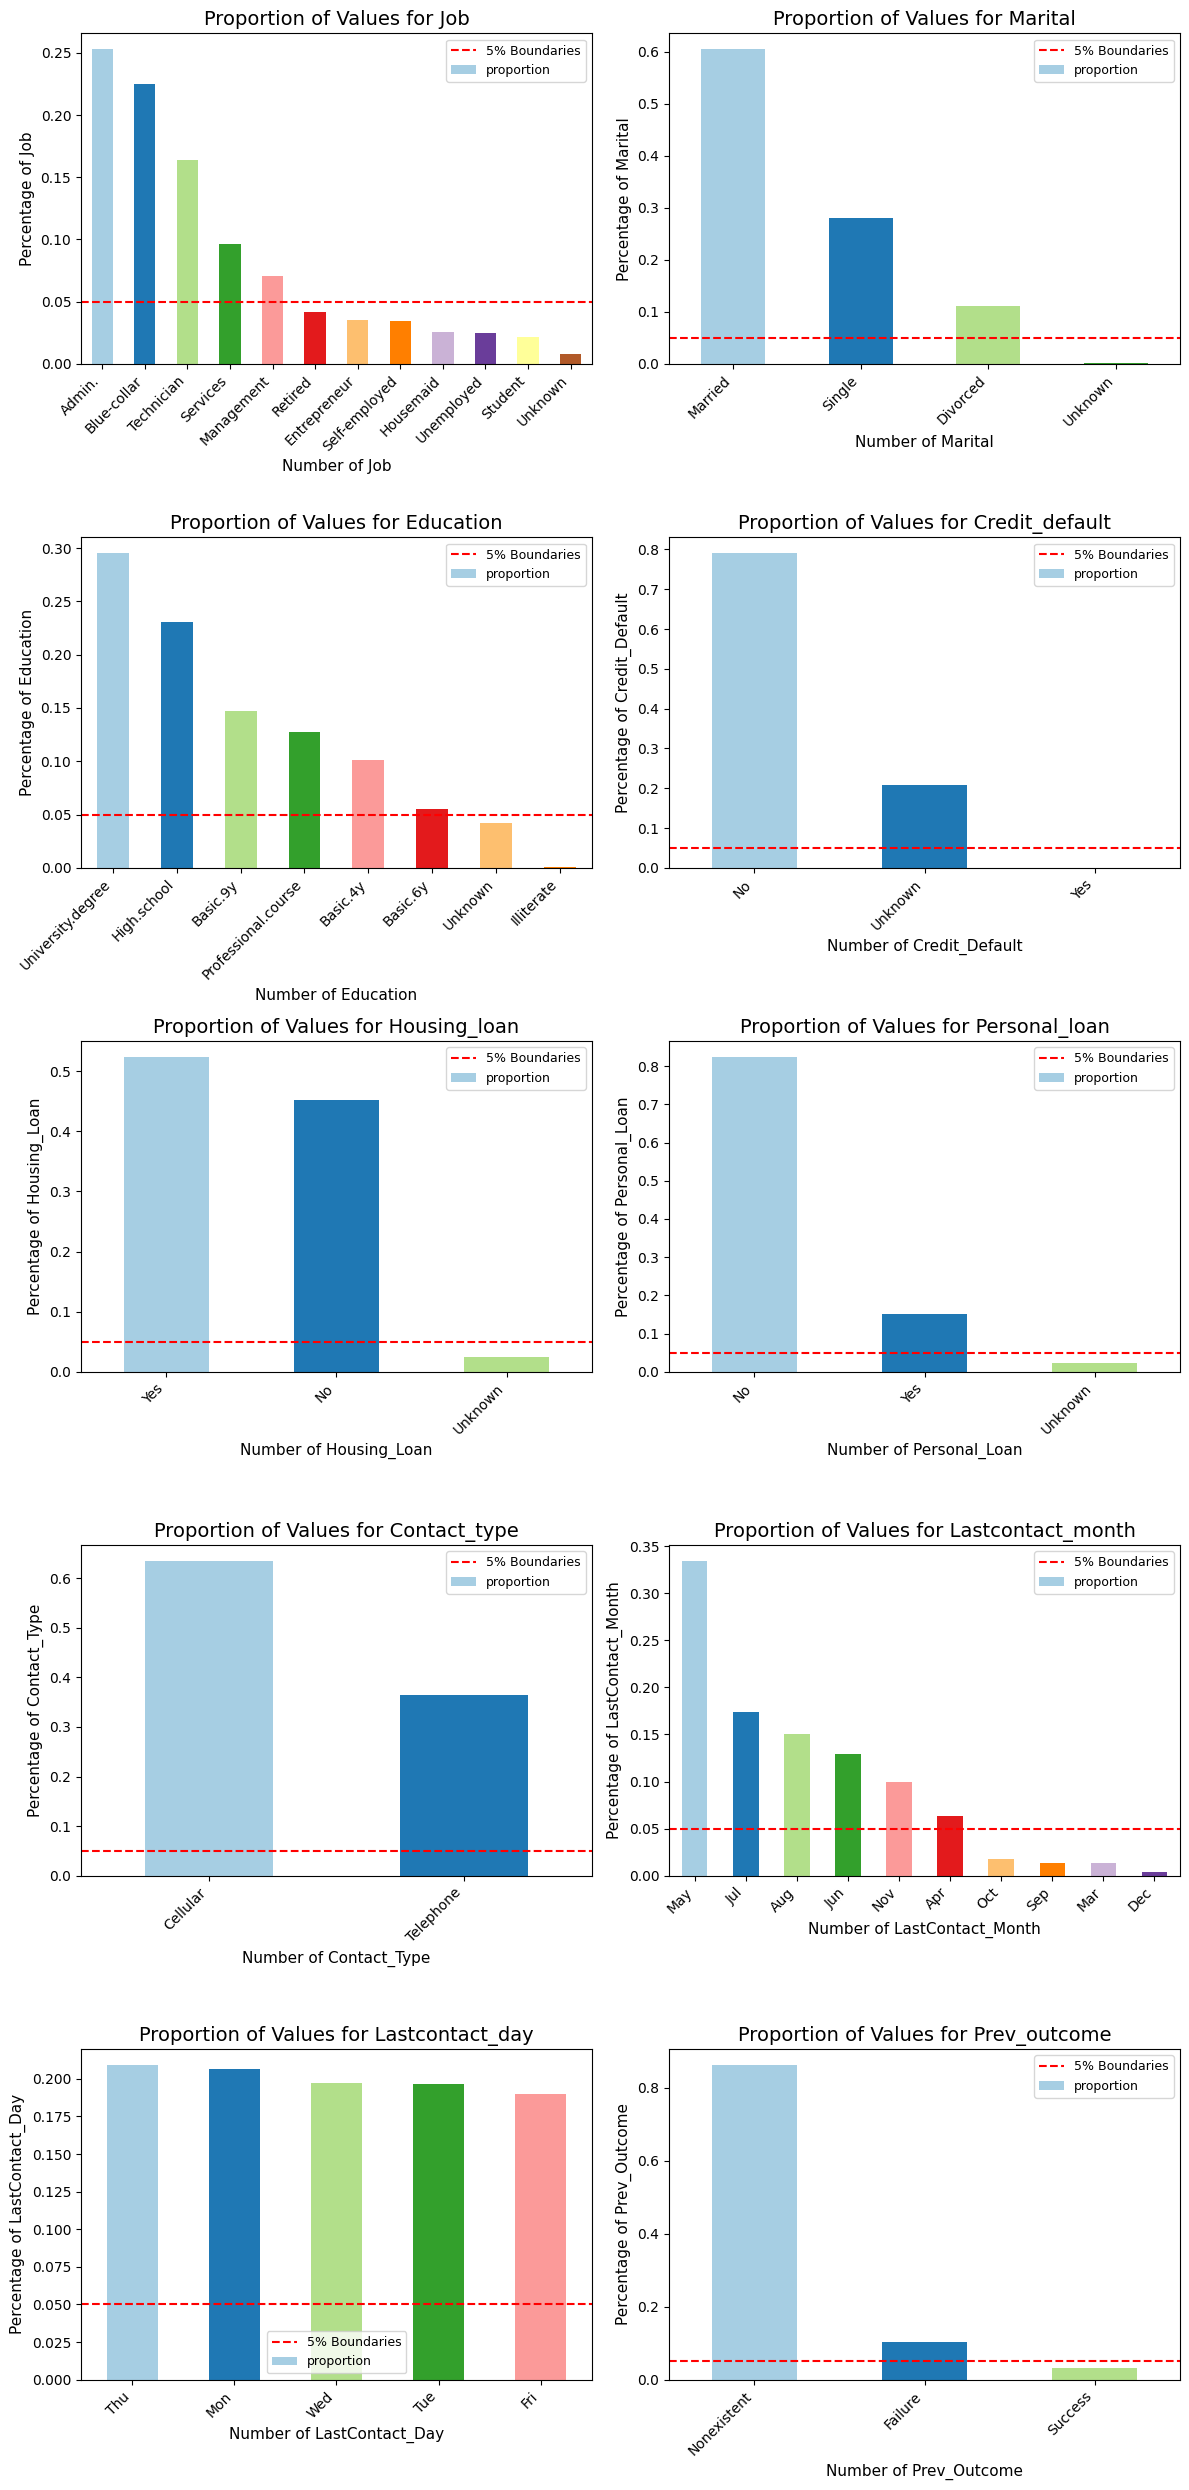

In [32]:
def plot_categorical_proportions(df, columns):

    n_cols = 2
    n_rows = len(columns) // n_cols + (len(columns) % n_cols > 0)

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, n_rows*5))
    axes = axes.flatten()

    for ax, column in zip(axes, columns):
        # Calculate the value counts and their proportions
        value_counts = df[column].value_counts(normalize=True).sort_values(ascending=False)

        # Create the bar plot
        value_counts.plot(kind='bar', ax=ax, color=sns.color_palette('Paired', len(value_counts)))
        ax.axhline(y=0.05, color='red', linestyle='--', label='5% Boundaries')

        ax.set_title(f'Proportion of Values for {column.capitalize()}', fontsize=14)
        ax.set_xlabel(f'Number of {column}', fontsize=11)
        ax.set_ylabel(f'Percentage of {column}', fontsize=11)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
        ax.legend(fontsize=9)

    plt.tight_layout()
    plt.show()
columns = ['Job', 'Marital', 'Education', 'Credit_Default', 'Housing_Loan', 'Personal_Loan', 'Contact_Type', 'LastContact_Month', 'LastContact_Day', 'Prev_Outcome']
plot_categorical_proportions(df, columns)

In [33]:
def col_analysis(df, col_name, deposit_col):

    # Calculate value counts and percentages
    value_counts = df[col_name].value_counts()
    value_percentage = (value_counts * 100 / value_counts.sum()).round(2)

    # Calculate overall counts and percentages for deposits
    total_count = len(df)
    deposit_counts = df[df[deposit_col] == 'Yes'][col_name].value_counts()
    no_deposit_counts = df[df[deposit_col] == 'No'][col_name].value_counts()

    # Calculate counts and percentages for each category
    deposit_yes_pct = (
        deposit_counts * 100 / total_count
    ).reindex(value_counts.index, fill_value=0).round(2)

    deposit_no_pct = (
        no_deposit_counts * 100 / total_count
    ).reindex(value_counts.index, fill_value=0).round(2)

    # Calculate CVR for each category
    cvr = ((deposit_yes_pct/value_percentage)*100).round(2)

    # Create the results DataFrame
    df_col = pd.DataFrame({
        'Column': value_counts.index,
        'Total Count': value_counts.values,
        'Proportion (%)': value_percentage.values,
        'Deposit Yes Count': deposit_counts.reindex(value_counts.index, fill_value=0).values,
        'Deposit Yes Pct (%)': deposit_yes_pct.values,
        'Deposit No Count': no_deposit_counts.reindex(value_counts.index, fill_value=0).values,
        'Deposit No Pct (%)': deposit_no_pct.values,
        '% CVR': cvr.values
    }).reset_index(drop=True)

    # Rename columns to reflect parameter names
    df_col.columns = [col_name, 'Total Count', 'Proportion (%)', 'Deposit Yes Count', 'Deposit Yes Pct (%)', 'Deposit No Count', 'Deposit No Pct (%)','% CVR']

    # Sort by 'Deposit Yes Pct (%)' in descending order
    df_col_sorted = df_col.sort_values(by='Deposit Yes Pct (%)', ascending=False)

    return df_col_sorted

In [34]:
def plot_col_analysis(df_job, col_name):

    sns.set(style="whitegrid")

    # Melt the DataFrame to use with seaborn
    df_melted = df_job.melt(id_vars=col_name, value_vars=['Deposit Yes Pct (%)', 'Deposit No Pct (%)'],
                            var_name='Deposit Type', value_name='Percentage')

    # Create the bar plot
    plt.figure(figsize=(9, 5))
    bar_plot = sns.barplot(data=df_melted, x=col_name, y='Percentage', hue='Deposit Type',
                          palette=["blue", "pink"], ci=None, edgecolor="brown")

    # Add annotations for each bar
    for p in bar_plot.patches:
        bar_plot.annotate(format(p.get_height(), '.2f'), # formats the text to two decimal places
                          (p.get_x() + p.get_width() / 2., p.get_height()), #centers the text horizontally on the bar, places the text at the top of the bar
                          ha = 'center', va = 'center',
                          xytext = (0, 5), #adds a small vertical offset to ensure the text does not overlap the bar edge.
                          textcoords = 'offset points',
                          fontsize=7, color='black')

    title = f'Deposit Percentages by {col_name} Category'
    plt.title(title, fontsize=14)
    plt.xlabel(col_name, fontsize=11)
    plt.ylabel('Percentage (%)', fontsize=10)
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.legend(title='Deposit Type', title_fontsize='10', fontsize='8')
    plt.tight_layout()
    plt.show()

### **Job Analysis**

In [35]:
# Job Analysis
print("Job Analysis by Calculating the Percentage of Deposits (\"Yes\" and \"No\") for Each Job Category Relative to the Entire Dataset")
df_job_analysis = col_analysis(df, 'Job', 'Deposit')
df_job_analysis

Job Analysis by Calculating the Percentage of Deposits ("Yes" and "No") for Each Job Category Relative to the Entire Dataset


,Job,Total Count,Proportion (%),Deposit Yes Count,Deposit Yes Pct (%),Deposit No Count,Deposit No Pct (%),% CVR
0,Admin.,10419,25.30,1351,3.28,9068,22.02,12.96
2,Technician,6739,16.37,730,1.77,6009,14.59,10.81
1,Blue-collar,9253,22.47,638,1.55,8615,20.92,6.90
5,Retired,1718,4.17,434,1.05,1284,3.12,25.18
4,Management,2924,7.10,328,0.80,2596,6.30,11.27
3,Services,3967,9.63,323,0.78,3644,8.85,8.10
10,Student,875,2.13,275,0.67,600,1.46,31.46
7,Self-employed,1421,3.45,149,0.36,1272,3.09,10.43
9,Unemployed,1014,2.46,144,0.35,870,2.11,14.23
6,Entrepreneur,1456,3.54,124,0.30,1332,3.23,8.47


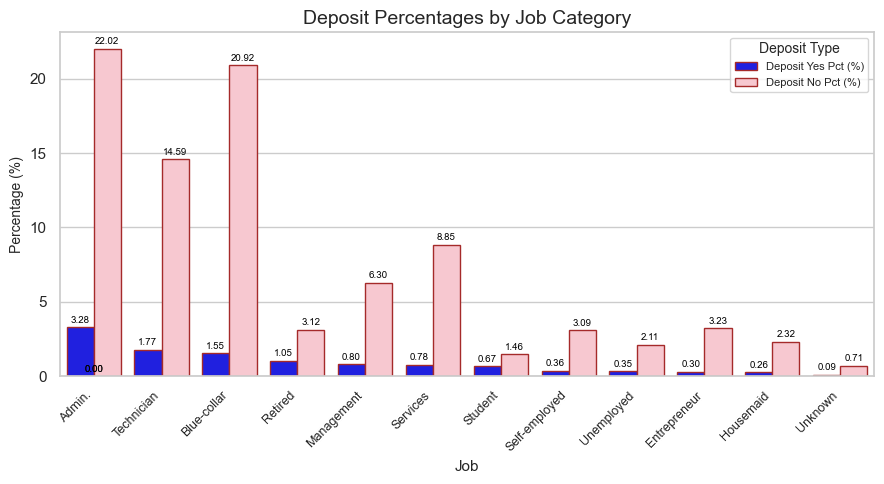

In [36]:
plot_col_analysis(df_job_analysis, 'Job')

Most of customers work as admins, blue-collar workers, and technicians so it's also have highest proportion in both subscribe and not subscribe term deposit. Additionally, customer with job titles **Student and Retired show higher percentage of term deposit** at around **31% and 25%** respectively, **more than 2x compared to customers with other job titles.** This indicates that retired customers and students have high interest in term deposit and it would be advantageous to these customers.

### **Marital Status Analysis**

In [37]:
# Marital Status Analysis
print("Marital Status Analysis by Calculating the Percentage of Deposits (\"Yes\" and \"No\") for Each Marital Category Relative to the Entire Dataset")
df_marital_analysis = col_analysis(df, 'Marital', 'Deposit')
df_marital_analysis

Marital Status Analysis by Calculating the Percentage of Deposits ("Yes" and "No") for Each Marital Category Relative to the Entire Dataset


,Marital,Total Count,Proportion (%),Deposit Yes Count,Deposit Yes Pct (%),Deposit No Count,Deposit No Pct (%),% CVR
0,Married,24921,60.52,2531,6.15,22390,54.38,10.16
1,Single,11564,28.08,1620,3.93,9944,24.15,14.00
2,Divorced,4611,11.20,476,1.16,4135,10.04,10.36
3,Unknown,80,0.19,12,0.03,68,0.17,15.79


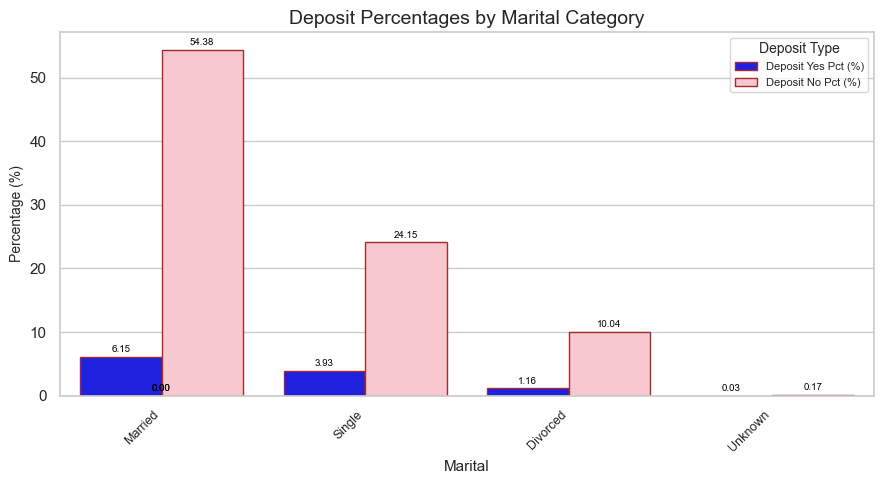

In [38]:
plot_col_analysis(df_marital_analysis, 'Marital')

The number of Married customers who subscribed to the term deposit is approximately 5 times the number of Unknown customers who subscribed (2531 vs. 12). But, **single customers are about 1.38 times more likely to subscribe compared to Married customers**.

### **Education Analysis**

In [39]:
# Education Analysis
print("Education Analysis by Calculating the Percentage of Deposits (\"Yes\" and \"No\") for Each Education Category Relative to the Entire Dataset")
df_edu_analysis = col_analysis(df, 'Education', 'Deposit')
df_edu_analysis

Education Analysis by Calculating the Percentage of Deposits ("Yes" and "No") for Each Education Category Relative to the Entire Dataset


,Education,Total Count,Proportion (%),Deposit Yes Count,Deposit Yes Pct (%),Deposit No Count,Deposit No Pct (%),% CVR
0,University.degree,12164,29.54,1669,4.05,10495,25.49,13.71
1,High.school,9512,23.10,1031,2.50,8481,20.60,10.82
3,Professional.course,5240,12.73,595,1.45,4645,11.28,11.39
2,Basic.9y,6045,14.68,473,1.15,5572,13.53,7.83
4,Basic.4y,4176,10.14,428,1.04,3748,9.10,10.26
6,Unknown,1730,4.20,251,0.61,1479,3.59,14.52
5,Basic.6y,2291,5.56,188,0.46,2103,5.11,8.27
7,Illiterate,18,0.04,4,0.01,14,0.03,25.00


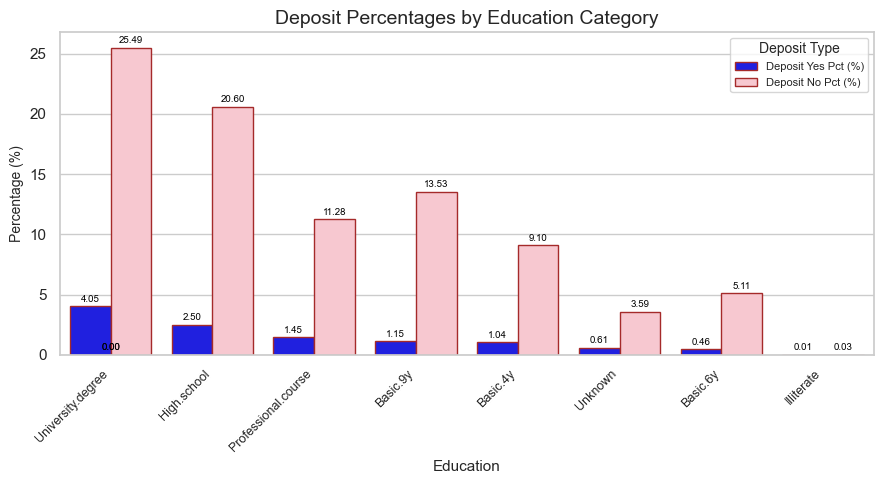

In [40]:
plot_col_analysis(df_edu_analysis, 'Education')

We can see majority of customer's education are university degree, high school, basic 9y, and professional course, it's also have highest proportion in both subscribe and not subscribe term deposit. Illiterate customers have the highest subscription rate to term deposits, with a Conversion Rate (CVR) of 25%, making them 1.6 times more likely to subscribe compared to customers with University degree (CVR = 13.71%). However, this high CVR should be interpreted with caution due to the very small sample size of 18 customers in this category. The small number of observations means the CVR may not be as reliable or generalizable. 

**University degree customers have a CVR of 13.71%, which is** higher than others and **approximately 1.75 times higher than that of Basic.9y customers (7.83%).**

### **Credit Default Analysis**

In [41]:
# Credit Default Analysis
print("Credit Default Analysis by Calculating the Percentage of Deposits (\"Yes\" and \"No\") for Each Credit Default Relative to the Entire Dataset")
df_credit_analysis = col_analysis(df, 'Credit_Default', 'Deposit')
df_credit_analysis

Credit Default Analysis by Calculating the Percentage of Deposits ("Yes" and "No") for Each Credit Default Relative to the Entire Dataset


,Credit_Default,Total Count,Proportion (%),Deposit Yes Count,Deposit Yes Pct (%),Deposit No Count,Deposit No Pct (%),% CVR
0,No,32577,79.12,4196,10.19,28381,68.93,12.88
1,Unknown,8596,20.88,443,1.08,8153,19.80,5.17
2,Yes,3,0.01,0,0.00,3,0.01,0.00


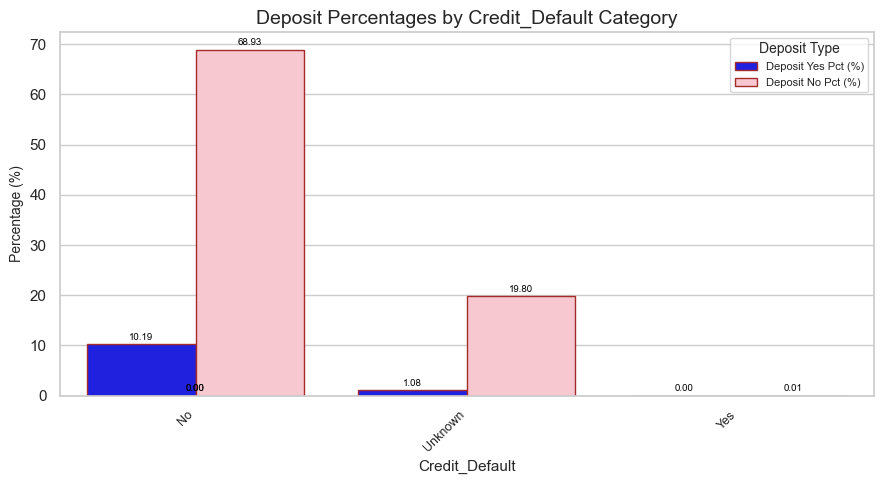

In [42]:
plot_col_analysis(df_credit_analysis, 'Credit_Default')

This feature represent customer's credit status, default or not. Default is the failure to make required payments on a credit ([source](https://www.investopedia.com/terms/d/default2.asp)).

**Majority of customers have no credit defaults at 79.12%** and it's also have highest proportion in both subscribe and not subscribe term deposit. Data proportion for Credit_Default = 'yes' is far smaller than 2 other category and 'Unknown' value have quite big proportion. This can be an issue for interpretation process.

### **Housing Loan Analysis**

In [43]:
# Housing Loan Analysis
print("Housing Loan Analysis by Calculating the Percentage of Deposits (\"Yes\" and \"No\") for Housing Loan Relative to the Entire Dataset")
df_houseloan_analysis = col_analysis(df, 'Housing_Loan', 'Deposit')
df_houseloan_analysis

Housing Loan Analysis by Calculating the Percentage of Deposits ("Yes" and "No") for Housing Loan Relative to the Entire Dataset


,Housing_Loan,Total Count,Proportion (%),Deposit Yes Count,Deposit Yes Pct (%),Deposit No Count,Deposit No Pct (%),% CVR
0,Yes,21571,52.39,2507,6.09,19064,46.30,11.62
1,No,18615,45.21,2025,4.92,16590,40.29,10.88
2,Unknown,990,2.40,107,0.26,883,2.14,10.83


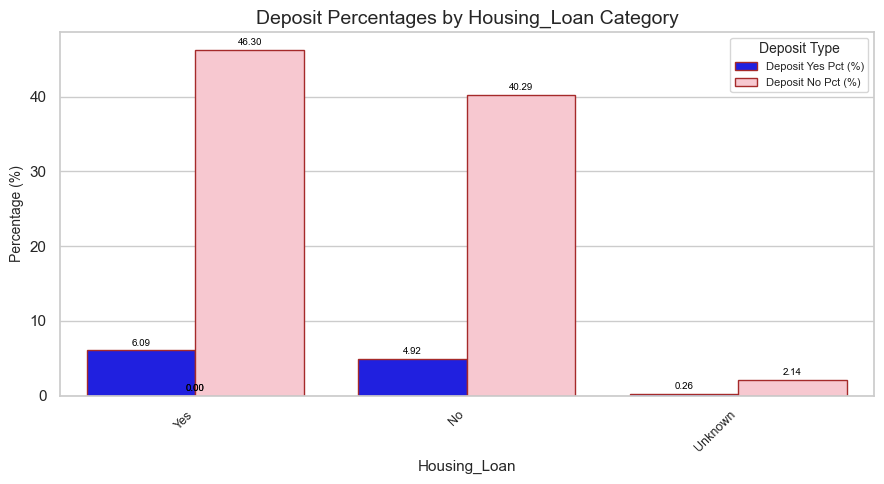

In [44]:
plot_col_analysis(df_houseloan_analysis, 'Housing_Loan')

**Majority of customer have housing loan at 52.39%** and it's also have highest proportion in both subscribe and not subscribe term deposit.

### **Personal Loan Analysis**


In [45]:
# Personal Loan Analysis
print("Personal Loan Analysis by Calculating the Percentage of Deposits (\"Yes\" and \"No\") for Personal Loan Relative to the Entire Dataset")
df_perloan_analysis = col_analysis(df, 'Personal_Loan', 'Deposit')
df_perloan_analysis

Personal Loan Analysis by Calculating the Percentage of Deposits ("Yes" and "No") for Personal Loan Relative to the Entire Dataset


,Personal_Loan,Total Count,Proportion (%),Deposit Yes Count,Deposit Yes Pct (%),Deposit No Count,Deposit No Pct (%),% CVR
0,No,33938,82.42,3849,9.35,30089,73.07,11.34
1,Yes,6248,15.17,683,1.66,5565,13.52,10.94
2,Unknown,990,2.40,107,0.26,883,2.14,10.83


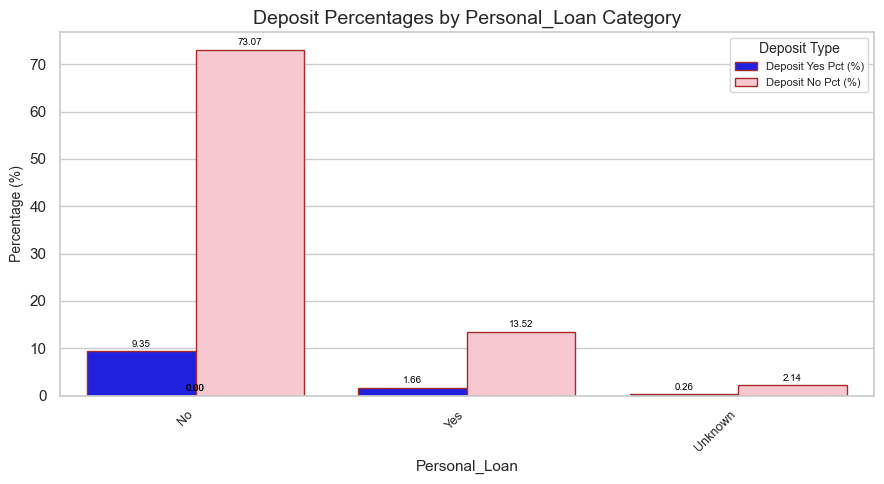

In [46]:
plot_col_analysis(df_perloan_analysis, 'Personal_Loan')

**Majority of customers have no personal loan (82.42%)** and it's also have highest proportion in both subscribe and not subscribe term deposit.

### **Contact Type Analysis**

In [47]:
# Contact Type Analysis
print("Contact Type Analysis by Calculating the Percentage of Deposits (\"Yes\" and \"No\") for Contact Type Relative to the Entire Dataset")
df_contact_analysis = col_analysis(df, 'Contact_Type', 'Deposit')
df_contact_analysis

Contact Type Analysis by Calculating the Percentage of Deposits ("Yes" and "No") for Contact Type Relative to the Entire Dataset


,Contact_Type,Total Count,Proportion (%),Deposit Yes Count,Deposit Yes Pct (%),Deposit No Count,Deposit No Pct (%),% CVR
0,Cellular,26135,63.47,3852,9.35,22283,54.12,14.73
1,Telephone,15041,36.53,787,1.91,14254,34.62,5.23


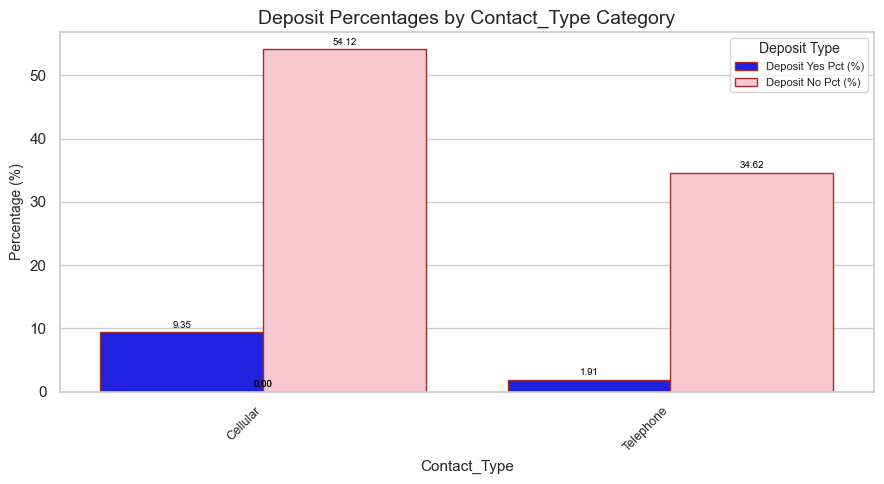

In [48]:
plot_col_analysis(df_contact_analysis, 'Contact_Type')

Contact type cellular refers to contact communication via mobile phones and contact type telephone refers to communication via landline phones.
Majority of customers are contacted by cellular and it's also have highest proportion in both subscribe and not subscribe term deposit. **Cellular contacts have a CVR of 14.73%, which is 2.82 times higher than the CVR of Telephone contacts (5.23%).**

### **Last Contact Month Analysis**

In [49]:
# Last Contact Month Analysis
print("Last Contact Month Analysis by Calculating the Percentage of Deposits (\"Yes\" and \"No\") for Last Contact Month Relative to the Entire Dataset")
df_month_analysis = col_analysis(df, 'LastContact_Month', 'Deposit')
df_month_analysis

Last Contact Month Analysis by Calculating the Percentage of Deposits ("Yes" and "No") for Last Contact Month Relative to the Entire Dataset


,LastContact_Month,Total Count,Proportion (%),Deposit Yes Count,Deposit Yes Pct (%),Deposit No Count,Deposit No Pct (%),% CVR
0,May,13767,33.43,886,2.15,12881,31.28,6.43
2,Aug,6176,15.00,655,1.59,5521,13.41,10.60
1,Jul,7169,17.41,648,1.57,6521,15.84,9.02
3,Jun,5318,12.92,559,1.36,4759,11.56,10.53
5,Apr,2631,6.39,539,1.31,2092,5.08,20.50
4,Nov,4100,9.96,416,1.01,3684,8.95,10.14
6,Oct,717,1.74,315,0.77,402,0.98,44.25
8,Mar,546,1.33,276,0.67,270,0.66,50.38
7,Sep,570,1.38,256,0.62,314,0.76,44.93
9,Dec,182,0.44,89,0.22,93,0.23,50.00


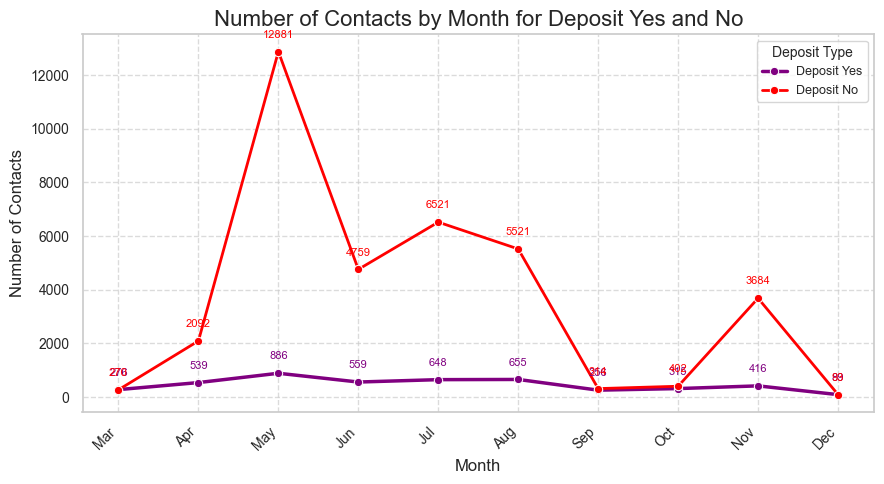

In [50]:
# Define month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Aggregate data by month and deposit type
month_deposit_counts = df.groupby(['LastContact_Month', 'Deposit']).size().unstack().fillna(0)

# Reset index to use for plotting
df_month_deposit = month_deposit_counts.reset_index()

# Ensure 'LastContact_Month' is treated as categorical with the defined order
df_month_deposit['LastContact_Month'] = pd.Categorical(df_month_deposit['LastContact_Month'], categories=month_order, ordered=True)

# Plotting
plt.figure(figsize=(9, 5))
sns.lineplot(data=df_month_deposit, x='LastContact_Month', y='Yes', marker='o', label='Deposit Yes', color='purple', linewidth=2.5)
sns.lineplot(data=df_month_deposit, x='LastContact_Month', y='No', marker='o', label='Deposit No', color='red', linewidth=2)
plt.legend(title='Deposit Type', title_fontsize='10', fontsize='9')

# Add annotations
for index, row in df_month_deposit.iterrows():
    plt.annotate(f'{int(row["Yes"])}', (row["LastContact_Month"], row["Yes"]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='purple')
    plt.annotate(f'{int(row["No"])}', (row["LastContact_Month"], row["No"]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='red')

# Enhance the plot
plt.title('Number of Contacts by Month for Deposit Yes and No', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Contacts', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

There are no customers who last contacted in January or February.
Most of customers are contacted in May, July, and August but percentage of customer who subscribe term deposit is higher when contacted in April, Oct, Sep, March, December. 

**March and December have the highest CVR at 50.38% and 50.00%. This is approximately 5.4 times higher than the CVR in May (6.43%), which has the lowest CVR among the months with higher data points.**

October and September also show high CVR at 44.25% and 44.93% (around 6.9 times higher than May’s CVR of 6.43%).

### **Last Contact Day Analysis**

In [51]:
# Last Contact Day Analysis
print("Last Contact Day Analysis by Calculating the Percentage of Deposits (\"Yes\" and \"No\") for Last Contact Day Relative to the Entire Dataset")
df_day_analysis = col_analysis(df, 'LastContact_Day', 'Deposit')
df_day_analysis

Last Contact Day Analysis by Calculating the Percentage of Deposits ("Yes" and "No") for Last Contact Day Relative to the Entire Dataset


,LastContact_Day,Total Count,Proportion (%),Deposit Yes Count,Deposit Yes Pct (%),Deposit No Count,Deposit No Pct (%),% CVR
0,Thu,8618,20.93,1044,2.54,7574,18.39,12.14
3,Tue,8086,19.64,953,2.31,7133,17.32,11.76
2,Wed,8134,19.75,949,2.30,7185,17.45,11.65
1,Mon,8512,20.67,847,2.06,7665,18.62,9.97
4,Fri,7826,19.01,846,2.05,6980,16.95,10.78


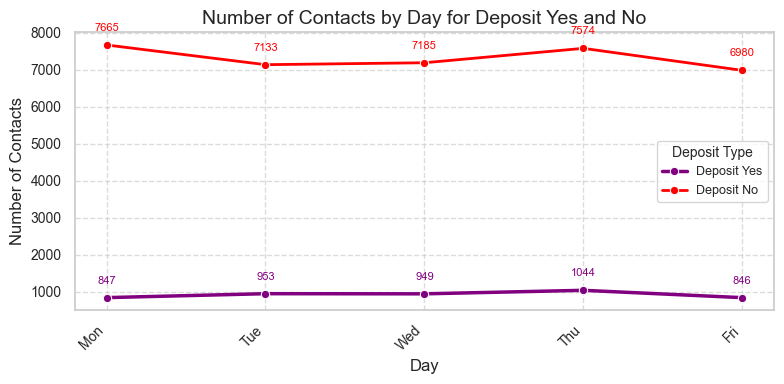

In [52]:
# Define day order
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']

# Aggregate data by day and deposit type
day_deposit_counts = df.groupby(['LastContact_Day', 'Deposit']).size().unstack().fillna(0)

# Reset index to use for plotting
df_day_deposit = day_deposit_counts.reset_index()

# Ensure 'LastContact_Day' is treated as categorical with the defined order
df_day_deposit['LastContact_Day'] = pd.Categorical(df_day_deposit['LastContact_Day'], categories=day_order, ordered=True)

# Plotting
plt.figure(figsize=(8, 4))
sns.lineplot(data=df_day_deposit, x='LastContact_Day', y='Yes', marker='o', label='Deposit Yes', color='purple', linewidth=2.5)
sns.lineplot(data=df_day_deposit, x='LastContact_Day', y='No', marker='o', label='Deposit No', color='red', linewidth=2)
plt.legend(title='Deposit Type', title_fontsize='10', fontsize='9')

# Add annotations
for index, row in df_day_deposit.iterrows():
    plt.annotate(f'{int(row["Yes"])}', (row["LastContact_Day"], row["Yes"]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='purple')
    plt.annotate(f'{int(row["No"])}', (row["LastContact_Day"], row["No"]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='red')

# Enhance the plot
plt.title('Number of Contacts by Day for Deposit Yes and No', fontsize=14)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Number of Contacts', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The number of customers last contacted in each day are similar with most of customers are last contacted in Thursday. **Thursday has the highest CVR at 12.14% that is 1.2 times higher than Monday (9.97%) which has the lowest CVR among the days.**

### **Previous Outcome Analysis**

In [53]:
# Previous Outcome Analysis
print("Previous Outcome Month Analysis by Calculating the Percentage of Deposits (\"Yes\" and \"No\") for Previous Outcome Relative to the Entire Dataset")
df_poutcome_analysis = col_analysis(df, 'Prev_Outcome', 'Deposit')
df_poutcome_analysis

Previous Outcome Month Analysis by Calculating the Percentage of Deposits ("Yes" and "No") for Previous Outcome Relative to the Entire Dataset


,Prev_Outcome,Total Count,Proportion (%),Deposit Yes Count,Deposit Yes Pct (%),Deposit No Count,Deposit No Pct (%),% CVR
0,Nonexistent,35551,86.34,3140,7.63,32411,78.71,8.84
2,Success,1373,3.33,894,2.17,479,1.16,65.17
1,Failure,4252,10.33,605,1.47,3647,8.86,14.23


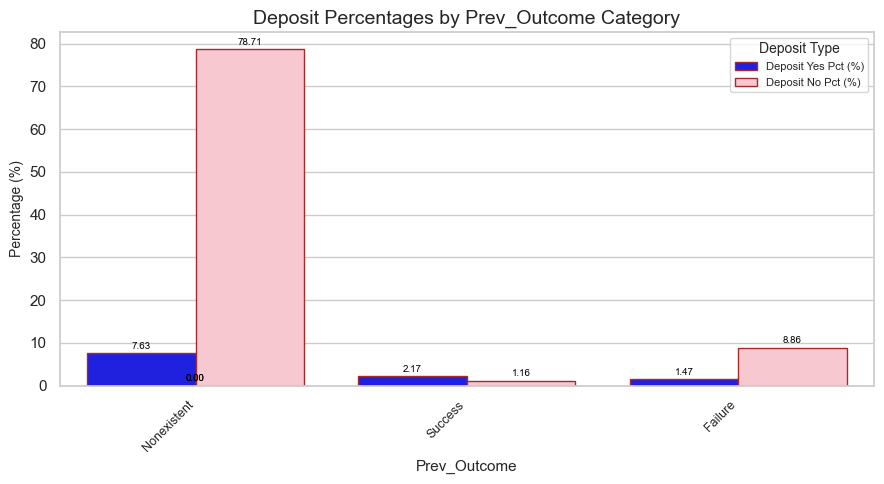

In [54]:
plot_col_analysis(df_poutcome_analysis, 'Prev_Outcome')

Majority of customers have nonexistent outcome from previous campaign and it's also have highest proportion in both subscribe and not subscribe term deposit. **Customers with a Previous Campaign Outcome of Success have the highest CVR, at 65.11%, indicating they are about 8.5 times more likely to subscribe** compared to those with a 'Nonexistent' previous outcome (7.63%).

## **3.3 Subscribe Term Deposit Analysis (Target Analysis)**

In [55]:
# Calculate Data Who Subscribe and Not Subscribe
target = df['Deposit'].value_counts()

# Calculate Percentage Subscribe and Not Subscribe Term Deposit
percent = (target.values*100/df['Deposit'].count()).round(2)

target_df = pd.DataFrame({
    'Deposit':target.index,
    'Count':target.values,
    '%':percent
}).reset_index(drop=True)
target_df

,Deposit,Count,%
0,No,36537,88.73
1,Yes,4639,11.27


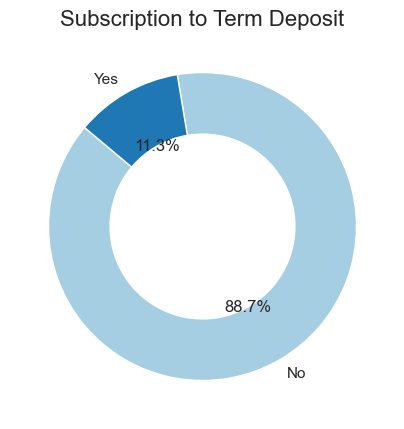

In [56]:
# Plotting Pie Chart
plt.figure(figsize=(5, 5))
colors = sns.color_palette("Paired")[0:len(target_df)]

plt.pie(target_df['Count'], labels=target_df['Deposit'], autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops=dict(width=0.4))

# Enhance the plot
plt.title('Subscription to Term Deposit', fontsize=16)
plt.show()

This dataset have :
- 88.73% customer not subscribe term deposit
- 11.27% customer subscribe term deposit

With only 11.27% of customers subscribe term deposit, there's significant room for improvement. This aligns well with our project goal of increasing the conversion rate.

## **3.4 Feature Correlation using PPS**

**Power Predictive Score** (PPS) is a metric used to measure the predictive power of a feature with respect to the target variable in a dataset. It helps in evaluating how well a feature can predict the target variable. By evaluating PPS, we can select features that have higher predictive power, thus improving the performance and interpretability of our model.

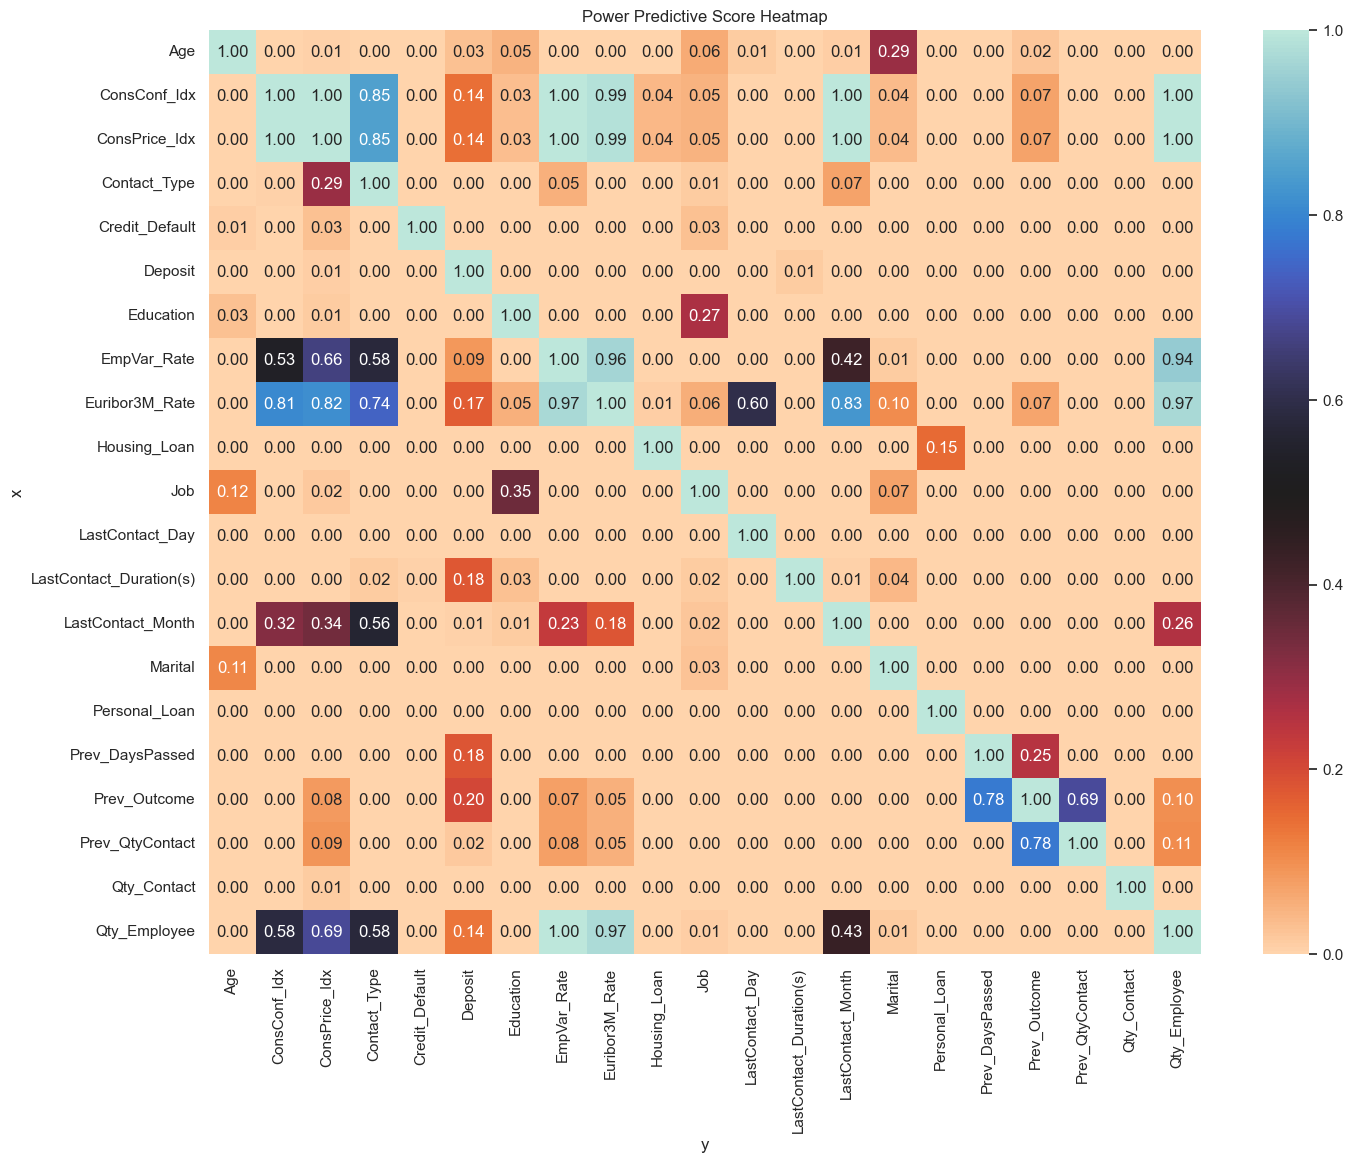

In [57]:
# Calculate the PPS matrix
pps_matrix = pps.matrix(df)

# Pivot the PPS matrix to a format suitable for heatmap
pps_pivot = pps_matrix.pivot(index='x', columns='y', values='ppscore')

# Show
plt.figure(figsize=(16,12))
sns.heatmap(pps_pivot, annot=True, fmt=".2f", cmap='icefire_r')
plt.title('Power Predictive Score Heatmap')
plt.show()

Based on the PPS analysis, none of the features have significant impact on predicting Deposit column.

We also find some features are redundant with others, such as : 
- ConsPrice_Idx and ConsConf_Idx, EmpVar_rate, Euribor3M_Rate, LastContact_Month, Qty_Employee
- ConsConf_Idx and EmpVar_rate, Euribor3M_Rate, LastContact_Month, Qty_Employee

We will consider to remove some of the redundant features in next process.

## **3.5 Deep Analysis**

From previous analysis, we found majority of customer have `Prev_DaysPassed` equal to 999 which mean they were not previously contacted. When the customer never contacted before, the `Prev_QtyContact` must be 0 and `Prev_Outcome` must be Nonexistent.

In [58]:
df_check = df[df['Prev_DaysPassed']==999]
df_check

,Age,Job,Marital,Education,Credit_Default,Housing_Loan,Personal_Loan,Contact_Type,LastContact_Month,LastContact_Day,LastContact_Duration(s),Qty_Contact,Prev_DaysPassed,Prev_QtyContact,Prev_Outcome,EmpVar_Rate,ConsPrice_Idx,ConsConf_Idx,Euribor3M_Rate,Qty_Employee,Deposit
0,56,Housemaid,Married,Basic.4y,No,No,No,Telephone,May,Mon,261,1,999,0,Nonexistent,1.1,93.994,-36.4,4.857,5191.0,No
1,57,Services,Married,High.school,Unknown,No,No,Telephone,May,Mon,149,1,999,0,Nonexistent,1.1,93.994,-36.4,4.857,5191.0,No
2,37,Services,Married,High.school,No,Yes,No,Telephone,May,Mon,226,1,999,0,Nonexistent,1.1,93.994,-36.4,4.857,5191.0,No
3,40,Admin.,Married,Basic.6y,No,No,No,Telephone,May,Mon,151,1,999,0,Nonexistent,1.1,93.994,-36.4,4.857,5191.0,No
4,56,Services,Married,High.school,No,No,Yes,Telephone,May,Mon,307,1,999,0,Nonexistent,1.1,93.994,-36.4,4.857,5191.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,Retired,Married,Professional.course,No,Yes,No,Cellular,Nov,Fri,334,1,999,0,Nonexistent,-1.1,94.767,-50.8,1.028,4963.6,Yes
41184,46,Blue-collar,Married,Professional.course,No,No,No,Cellular,Nov,Fri,383,1,999,0,Nonexistent,-1.1,94.767,-50.8,1.028,4963.6,No
41185,56,Retired,Married,University.degree,No,Yes,No,Cellular,Nov,Fri,189,2,999,0,Nonexistent,-1.1,94.767,-50.8,1.028,4963.6,No
41186,44,Technician,Married,Professional.course,No,No,No,Cellular,Nov,Fri,442,1,999,0,Nonexistent,-1.1,94.767,-50.8,1.028,4963.6,Yes


In [59]:
df[(df['Prev_DaysPassed']==999) & (df['Prev_QtyContact']!=0)]

,Age,Job,Marital,Education,Credit_Default,Housing_Loan,Personal_Loan,Contact_Type,LastContact_Month,LastContact_Day,LastContact_Duration(s),Qty_Contact,Prev_DaysPassed,Prev_QtyContact,Prev_Outcome,EmpVar_Rate,ConsPrice_Idx,ConsConf_Idx,Euribor3M_Rate,Qty_Employee,Deposit
24013,38,Blue-collar,Single,Unknown,No,Yes,No,Telephone,Oct,Tue,39,1,999,1,Failure,-0.1,93.798,-40.4,4.968,5195.8,No
24019,40,Services,Married,High.school,No,Yes,No,Telephone,Oct,Tue,144,1,999,1,Failure,-0.1,93.798,-40.4,4.968,5195.8,Yes
24076,36,Admin.,Married,University.degree,No,Yes,No,Telephone,Nov,Wed,449,1,999,1,Failure,-0.1,93.200,-42.0,4.663,5195.8,No
24102,36,Admin.,Married,High.school,No,Yes,No,Telephone,Nov,Wed,114,1,999,1,Failure,-0.1,93.200,-42.0,4.286,5195.8,Yes
24113,29,Self-employed,Married,University.degree,No,Yes,No,Telephone,Nov,Thu,86,1,999,1,Failure,-0.1,93.200,-42.0,4.245,5195.8,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41166,32,Admin.,Married,University.degree,No,No,No,Telephone,Nov,Wed,651,1,999,1,Failure,-1.1,94.767,-50.8,1.030,4963.6,Yes
41170,40,Management,Divorced,University.degree,No,Yes,No,Cellular,Nov,Wed,293,2,999,4,Failure,-1.1,94.767,-50.8,1.030,4963.6,No
41173,62,Retired,Married,University.degree,No,Yes,No,Cellular,Nov,Thu,329,1,999,2,Failure,-1.1,94.767,-50.8,1.031,4963.6,Yes
41175,34,Student,Single,Unknown,No,Yes,No,Cellular,Nov,Thu,180,1,999,2,Failure,-1.1,94.767,-50.8,1.031,4963.6,No


There are 4.110 data with `Prev_DaysPassed` = 999 but the `Prev_QtyContact` is not 0 and have `Prev_Outcome` other than 'Nonexistent'.
Because the data in this feature not accurately represent other data, **we consider to delete this feature since we have other features that might give us same information**.